# Parcial 3

### Juan José Tabares García 1007223478 

In [11]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

### Punto 2)

Request para obtener los datos, son organizados en un dataframe:

In [12]:
response = requests.get("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json")
rawjson = response.json()
data = pd.DataFrame(rawjson)
data

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [19]:
#1) Ajuste y Tiempo de vida medio

#Definimos la ecuacion que describe el comportamiento del decaimiento
def Nt(t,N0,λ):
    return N0*np.exp(-λ*t)

#Usamos curve_fit para obtener el valor de lambda en el ajuste, el valor de N0 tambien es entregado en la posicion 1
popt, pcov = curve_fit(Nt,data["t"],data["N(t)"])

λ = popt[1]
print("λ = ",λ)

λ =  0.025074357656264475


C:\Users\pegan\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Recordemos que:

$$ \lambda=\frac{\ln(2)}{\tau} $$

Y sabiendo que: 

$$ \lambda = 0.025074357656264475 $$

Podemos despejar $\tau$ como:

$$ \tau = \frac{\ln(2)}{0.025074357656264475} $$

El tiempo de vida medio es: 

In [20]:
print("τ = ", np.log(2)/λ) 

τ =  27.643666492360662


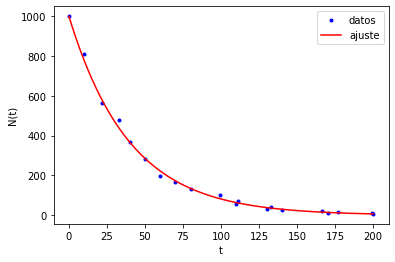

In [22]:
# 2) Graficacion
xaxis = np.linspace(0,200,1000)

plt.plot(data["t"],data["N(t)"],"b.",label="datos")
plt.plot(xaxis,[Nt(x,1000,λ) for x in xaxis],"r-",label="ajuste")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.legend()